# 서울시 유동 인구

선 그래프, 지도 그래프로 시각화

1. 1월 부터 7월 까지의 서울시 인구 유동량 변화 
    
    - 발생했던 사건/사고들을 포인터로 넣기

    - 전체적인 흐름을 위한 인트로 느낌

In [1]:
import pandas as pd
import numpy as np 
import datetime
import matplotlib.pyplot as plt 
import seaborn as sns 

from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [2]:
df1 = pd.read_csv('../input/Floating_Population_2001.csv')
df2 = pd.read_csv('../input/Floating_Population_2002.csv')
df3 = pd.read_csv('../input/Floating_Population_2003.csv')
df4 = pd.read_csv('../input/Floating_Population_2004.csv')
df5 = pd.read_csv('../input/Floating_Population_2005.csv')
df6 = pd.read_csv('../input/Floating_Population_2006.csv')
df7 = pd.read_csv('../input/Floating_Population_2007.csv')
df1.head()

,일자,시간(1시간단위),연령대(10세단위),성별,시,군구,유동인구수
0,20200101,0,70,여성,서울,중구,7910
1,20200101,1,20,여성,서울,중구,12330
2,20200101,1,40,여성,서울,구로구,34400
3,20200101,1,40,여성,서울,서대문구,24400
4,20200101,1,50,여성,서울,구로구,36590


In [3]:
df_all = pd.concat([df1, df2, df3, df4, df5, df6, df7])
df_all.head()

,일자,시간(1시간단위),연령대(10세단위),성별,시,군구,유동인구수
0,20200101,0,70,여성,서울,중구,7910
1,20200101,1,20,여성,서울,중구,12330
2,20200101,1,40,여성,서울,구로구,34400
3,20200101,1,40,여성,서울,서대문구,24400
4,20200101,1,50,여성,서울,구로구,36590


In [4]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1524000 entries, 0 to 223199
Data columns (total 7 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   일자          1524000 non-null  int64 
 1   시간(1시간단위)   1524000 non-null  int64 
 2   연령대(10세단위)  1524000 non-null  int64 
 3   성별          1524000 non-null  object
 4   시           1524000 non-null  object
 5   군구          1524000 non-null  object
 6   유동인구수       1524000 non-null  int64 
dtypes: int64(4), object(3)
memory usage: 93.0+ MB


In [5]:
df = df_all[['일자', '군구', '연령대(10세단위)', '유동인구수']]
df.head()

,일자,군구,연령대(10세단위),유동인구수
0,20200101,중구,70,7910
1,20200101,중구,20,12330
2,20200101,구로구,40,34400
3,20200101,서대문구,40,24400
4,20200101,구로구,50,36590


In [6]:
df['날짜'] = df['일자'].apply(lambda x : str(x)[:4] + "-" + str(x)[4:6] + "-" + str(x)[6:8])
df['월'] = df['일자'].apply(lambda x : str(x)[5])
df.drop(['일자'], axis=1, inplace=True)

df['날짜'] = pd.to_datetime(df['날짜'])

df.head()

,군구,연령대(10세단위),유동인구수,날짜,월
0,중구,70,7910,2020-01-01,1
1,중구,20,12330,2020-01-01,1
2,구로구,40,34400,2020-01-01,1
3,서대문구,40,24400,2020-01-01,1
4,구로구,50,36590,2020-01-01,1


## 이상치 확인

- 2월 23일

In [7]:
df2 = df2[['일자', '군구', '유동인구수']]
df2['월'] = df2['일자'].apply(lambda x : str(x)[5])
df2['날짜'] = df2['일자'].apply(lambda x : str(x)[:4] + "-" + str(x)[4:6] + "-" + str(x)[6:8])

sr = df2.groupby(['날짜'])['유동인구수'].sum()

print(sr)

날짜
2020-02-01    195446120
2020-02-02    193135540
2020-02-03    200783870
2020-02-04    200802350
2020-02-05    200737730
2020-02-06    200316170
2020-02-07    200240190
2020-02-08    193163740
2020-02-09    191774150
2020-02-10    200001410
2020-02-11    200093010
2020-02-12    200387080
2020-02-13    200076100
2020-02-14    200353110
2020-02-15    192917360
2020-02-16    191786310
2020-02-17    199724870
2020-02-18    199769060
2020-02-19    198476580
2020-02-20    199124070
2020-02-21    198802810
2020-02-22    192201860
2020-02-23    373087550
2020-02-24    198349480
2020-02-25    198340770
2020-02-26    197822170
2020-02-27    197288070
2020-02-28    197118850
2020-02-29    193806910
Name: 유동인구수, dtype: int64


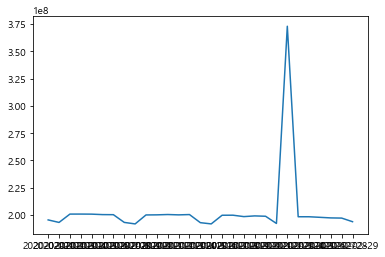

In [8]:
# 2월 23일이 뛰어 나와있는걸 확인
plt.plot(sr)

In [9]:
print(df2[df2['날짜'] == '2020-02-23']['유동인구수'].sum())

df2[df2['날짜'] == '2020-02-23']

373087550


,일자,군구,유동인구수,월,날짜
1646,20200223,광진구,65170,2,2020-02-23
1647,20200223,강서구,32120,2,2020-02-23
1648,20200223,강남구,100350,2,2020-02-23
1649,20200223,성북구,48020,2,2020-02-23
1650,20200223,은평구,57110,2,2020-02-23
...,...,...,...,...,...
208376,20200223,중랑구,41940,2,2020-02-23
208377,20200223,동작구,71480,2,2020-02-23
208378,20200223,서대문구,46190,2,2020-02-23
208379,20200223,중구,23000,2,2020-02-23


In [10]:
print(df2[df2['날짜'] == '2020-02-22']['유동인구수'].sum())

df2[df2['날짜'] == '2020-02-22']

192201860


,일자,군구,유동인구수,월,날짜
1574,20200222,중랑구,31140,2,2020-02-22
1575,20200222,은평구,22830,2,2020-02-22
1576,20200222,강동구,24240,2,2020-02-22
1577,20200222,송파구,16870,2,2020-02-22
1578,20200222,양천구,27890,2,2020-02-22
...,...,...,...,...,...
208282,20200222,관악구,24110,2,2020-02-22
208283,20200222,관악구,28320,2,2020-02-22
208284,20200222,관악구,50070,2,2020-02-22
208285,20200222,중구,13320,2,2020-02-22


- 2월 22일과 2월 23일을 비교해보니 너무 심하게 차이가 남을 알 수 있다.

- ??? 그렇게 심하게 차이가 날 이유가 없는데??

## 이상치 정리?

2월 23일 데이터를 2월 22일 데이터랑 같게 만들어줌

In [11]:
# df에서 2월 23일은 제외
# df = df[df['날짜'] != '2020-02-23']
df[df['날짜'] == '2020-02-23']

,군구,연령대(10세단위),유동인구수,날짜,월
1646,광진구,20,65170,2020-02-23,2
1647,강서구,70,32120,2020-02-23,2
1648,강남구,30,100350,2020-02-23,2
1649,성북구,60,48020,2020-02-23,2
1650,은평구,20,57110,2020-02-23,2
...,...,...,...,...,...
208376,중랑구,60,41940,2020-02-23,2
208377,동작구,30,71480,2020-02-23,2
208378,서대문구,30,46190,2020-02-23,2
208379,중구,50,23000,2020-02-23,2


In [12]:
sr = df.groupby(['날짜'])['유동인구수'].mean()
sr

날짜
2020-01-01    26723.079167
2020-01-02    28184.633333
2020-01-03    28241.270833
2020-01-04    27416.118056
2020-01-05    27187.176389
                  ...     
2020-07-27    27436.212500
2020-07-28    27480.434722
2020-07-29    27495.633333
2020-07-30    27357.062500
2020-07-31    27374.705556
Name: 유동인구수, Length: 212, dtype: float64

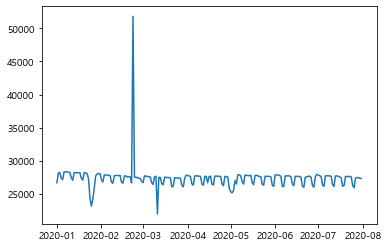

In [13]:
# 이상치 변경 전
plt.plot(sr)

In [14]:
# 이상치 변경 
# 이전날 데이터로 변경
sr['2020-02-23'] = sr['2020-02-22']

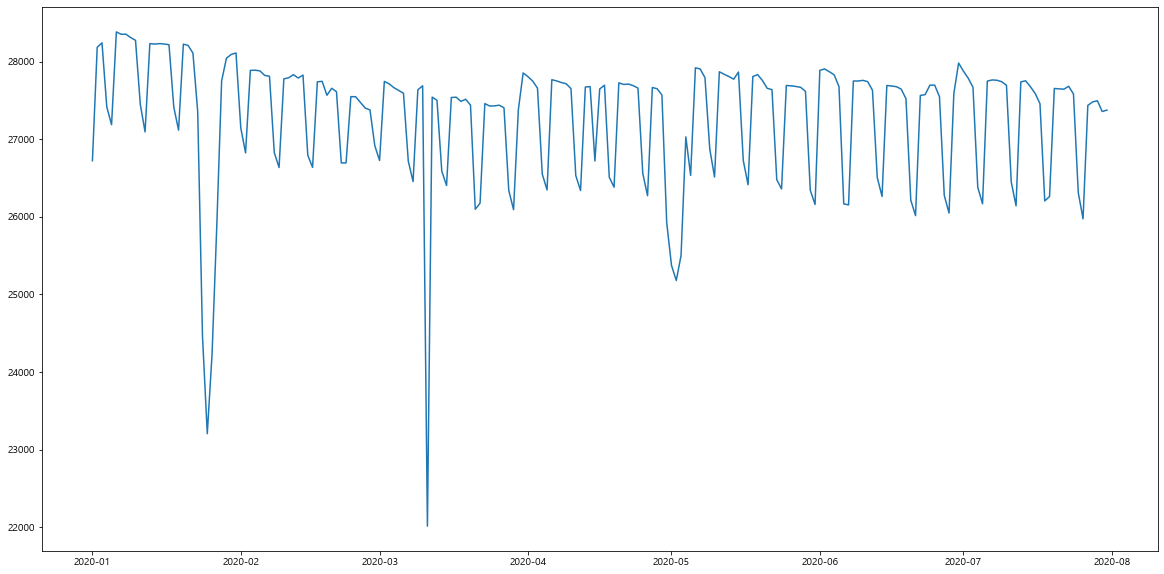

In [15]:
plt.figure(figsize=(20, 10))
plt.plot(sr)

In [16]:
sum_sr = df.groupby(['날짜'])['유동인구수'].sum()
sum_sr['2020-02-23'] = sum_sr['2020-02-22']
sum_sr = sum_sr // 10**3
sum_sr

날짜
2020-01-01    192406
2020-01-02    202929
2020-01-03    203337
2020-01-04    197396
2020-01-05    195747
               ...  
2020-07-27    197540
2020-07-28    197859
2020-07-29    197968
2020-07-30    196970
2020-07-31    197097
Name: 유동인구수, Length: 212, dtype: int64

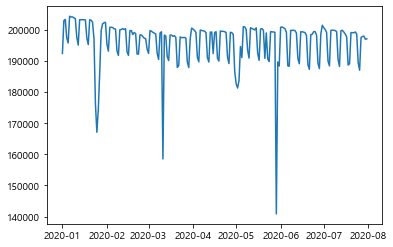

In [17]:
plt.plot(sum_sr)

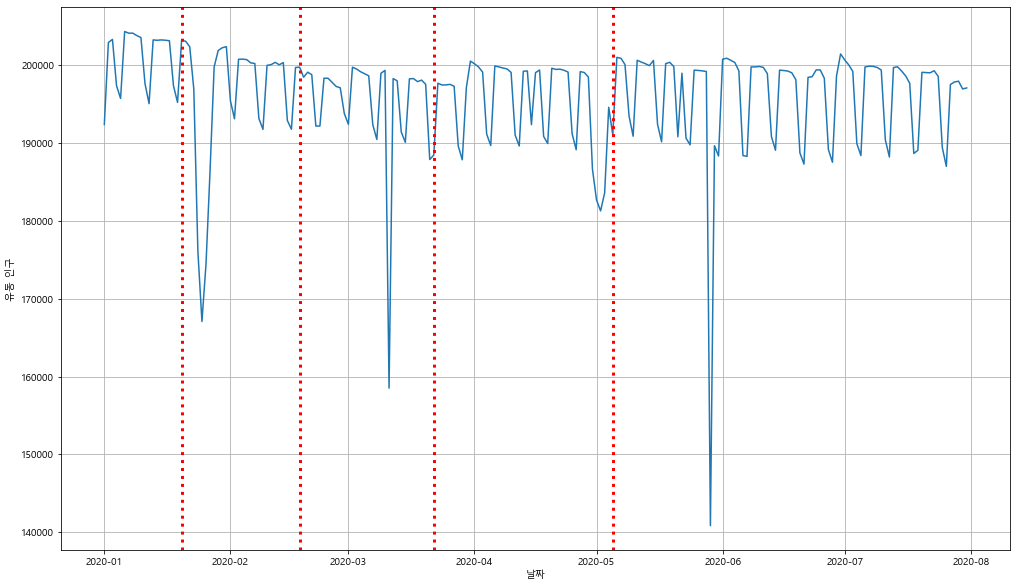

In [31]:
plt.figure(figsize=(17, 10))
plt.plot(sum_sr)
plt.grid()
# annotate
# plt.axvline(x=datetime.datetime(2020, 1, 20), label='line at x = {}'.format(date), color='r', linestyle=':', linewidth=3)

plt.axvline(x=datetime.datetime(2020, 1, 20), color='r', linestyle=':', linewidth=3)    # 국내 최초 확진자 발생
plt.axvline(x=datetime.datetime(2020, 2, 18), color='r', linestyle=':', linewidth=3)    # 신천지 관련 확진자 발생 및 급증
plt.axvline(x=datetime.datetime(2020, 3, 22), color='r', linestyle=':', linewidth=3)    # 고강도 사회적 거리두기 시행
plt.axvline(x=datetime.datetime(2020, 5, 5), color='r', linestyle=':', linewidth=3)     # 생활속 거리두기로 전환
plt.xlabel("날짜")
plt.ylabel("유동 인구")
plt.savefig('../output/floating-1.jpg')
plt.show()

# plt.legend(loc='best')
# x=datetime(2016, 2, 17)
# plt.annotate(x = '2020-02-18')

### 위 날짜 참고자료

- https://www.yna.co.kr/view/GYH20200707002100044?input=1363m

- https://www.yna.co.kr/view/AKR20200424137100017?input=1195m

- https://newsis.com/view/?id=NISI20200420_0000514803

- https://www.yna.co.kr/view/GYH20200904001500044?input=1363m

- https://www.yna.co.kr/view/GYH20200315002200044?input=1363m


### 월별 유동인구 분석

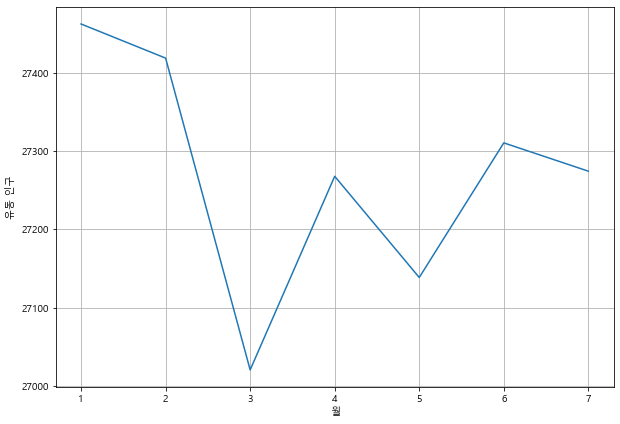

In [29]:
df = sr.reset_index()
df['월'] = df['날짜'].apply(lambda x : x.month)
df

pv = pd.pivot_table(df, index=['월'], values=['유동인구수'], aggfunc=np.mean)
pv

# 월별 서울 유동인구
plt.figure(figsize=(10, 7))
plt.plot(pv)
plt.grid()
plt.xlabel("월")
plt.ylabel("유동 인구")
plt.savefig('../output/floating-2.jpg')
plt.show()